# 資料來源(Date source) :
# Introduction to Numerical Computing with NumPy | SciPy 2019 Tutorial | Alex Chabot-Leclerc
# https://www.youtube.com/watch?v=ZB7BZMhfPgk



# 試著把兩個list相加會得到以下結果
 

In [25]:
a = [1,2,3,4,5]
b = [10,11,12,13,14,15]
print(a+b)

[1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15]


# 倘若想把個元素相加需要用到zip如下


In [26]:
result = []
for num1,num2 in zip(a,b):
    result.append(num1+num2)
print(result)

[11, 13, 15, 17, 19]


# np函數


In [36]:
import numpy as np
array = np.array([ [1,2,3,4],[5,6,7,8] ])
print(type(a)) #資料型態為 numpy.ndarray  "nd" 意思為 n dimentional
print(array.dtype) #裡面元素的資料型態為 int32
print(array.ndim)  #維度為 2
print(array.shape) #各維度尺寸為 (2,4) (2行4列)
print(array.size) #全部元素個數為 8

<class 'numpy.ndarray'>
int32
2
(2, 4)
8


# slicing  

var [ lower : upper : step ]

indices: 

       -5  -4  -3  -2  -1
        0   1   2   3   4
     [ 10, 11, 12, 13, 14 ]


In [37]:
slicing = np.array([ 10, 11, 12, 13, 14 ])
slicing[0:3]

array([10, 11, 12])

In [38]:
slicing[1:-2]

array([11, 12])

In [39]:
slicing[-3:]

array([12, 13, 14])

In [40]:
slicing[::2]

array([10, 12, 14])

二維slicing

                      0   1   2   3   4
           0 array([[ 1,  2,  3,  4,  5],
           1        [ 6,  7,  8,  9, 10],
           2        [11, 12, 13, 14, 15],
           3        [16, 17, 18, 19, 20],
           4        [21, 22, 23, 24, 25]])

In [52]:
twoDslicing = np.array(range(1,26))
twoDslicing = twoDslicing.reshape((5,5))  #reshape成 5*5
twoDslicing[0,2:4]

array([3, 4])

In [53]:
twoDslicing[3:,3:]

array([[19, 20],
       [24, 25]])

In [54]:
twoDslicing[:,2]

array([ 3,  8, 13, 18, 23])

In [55]:
twoDslicing[2::2,::2]

array([[11, 13, 15],
       [21, 23, 25]])

In [56]:
twoDslicing[-1,:]  ##最後一列

array([21, 22, 23, 24, 25])

用slicing複製 會改到原本x的值 

In [80]:
x = np.array([1,2,3,4,5])
print("x = ",x)
y = x[:2]
print("y = ",y)
y[0] = -1
print("y = ",y)
print("x = ",x)

z = x[0:2].__copy__()
z[1] = -2
print("z = ",z)
print("x = ",x)

x =  [1 2 3 4 5]
y =  [1 2]
y =  [-1  2]
x =  [-1  2  3  4  5]
z =  [-1 -2]
x =  [-1  2  3  4  5]


# 模糊化練習

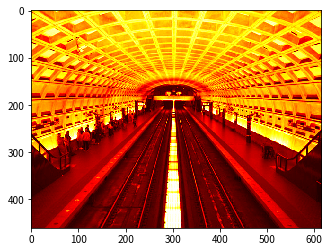

(461, 615)


In [1]:
"""
Filter Image
------------
Read in the "dc_metro" image and use an averaging filter
to "smooth" the image.  Use a "5 point stencil" where
you average the current pixel with its neighboring pixels::
              0 0 0 0 0 0 0
              0 0 0 x 0 0 0
              0 0 x x x 0 0
              0 0 0 x 0 0 0
              0 0 0 0 0 0 0
Plot the image, the smoothed image, and the difference between the
two.
Bonus
~~~~~
Re-filter the image by passing the result image through the filter again. Do
this 50 times and plot the resulting image.
See :ref:`filter-image-solution`.
"""

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

img = plt.imread("dc_metro.png") #匯入圖檔

plt.imshow(img, cmap=plt.cm.hot)
plt.show()
print(img.shape)




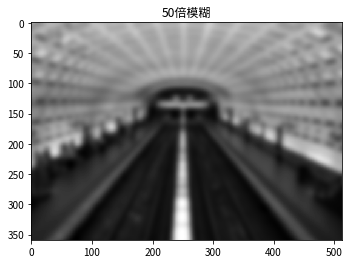

(359, 513)

In [2]:
def smooth(img):
    center = img[1:-1 ,1:-1]
    top =  img[ :-2 ,1:-1]
    left = img[1:-1 , :-2]
    right = img[1:-1 ,2:  ]
    down = img[2:   ,1:-1]
    blur = (center+top+left+right+down)/5
    return blur
blur = smooth(img)
for i in range(50):
    blur = smooth(blur)
plt.figure()
plt.gray()
plt.imshow(blur)
plt.title("50倍模糊")
plt.show()
blur.shape


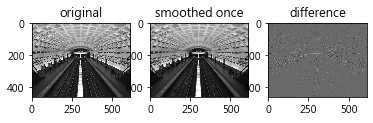

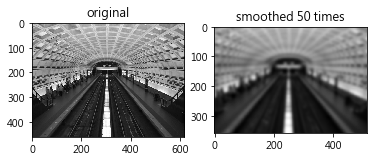

In [8]:
"""
Filter Image
------------
Read in the "dc_metro" image and use an averaging filter
to "smooth" the image.  Use a "5 point stencil" where
you average the current pixel with its neighboring pixels::
              0 0 0 0 0 0 0
              0 0 0 x 0 0 0
              0 0 x x x 0 0
              0 0 0 x 0 0 0
              0 0 0 0 0 0 0
Plot the image, the smoothed image, and the difference between the
two.
Bonus
~~~~~
Re-filter the image by passing the result image through the filter again. Do
this 50 times and plot the resulting image.
"""
import numpy as np
import matplotlib.pyplot as plt

def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed


img = plt.imread('dc_metro.png')
avg_img = smooth(img)


# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')


# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

# indexing by position

In [26]:
a = np.arange(0,80,10)
# a = array([ 0, 10, 20, 30, 40, 50, 60, 70])

#fancy indexing
indices = [1,2,-3]
y = a[indices]
# y = array([10, 20, 50])

a[indices] = 99
# a = array([ 0, 99, 99, 30, 40, 99, 60, 70])

In [30]:
mask = np.array([0,1,1,0,0,1,1,0] , dtype = bool)

#fancy indexing
y = a[mask]  
# y = array([99, 99, 99, 60])
a[mask] = 99
# a = array([ 0, 99, 99, 30, 40, 99, 99, 70])

array([ 0, 99, 99, 30, 40, 99, 99, 70])

# 將負數元素取出

In [34]:
a_array = np.array([-1,-3,1,4,-6,9,3])
negative = a_array<0
# negative = array([ True,  True, False, False,  True, False, False])
negativenum = a_array[negative]
# negativenum = array([-1, -3, -6])

array([-1, -3, -6])

# indexing in 2-D
二維索引

                      0   1   2   3   4
           0 array([[ 1,  2,  3,  4,  5],
           1        [ 6,  7,  8,  9, 10],
           2        [11, 12, 13, 14, 15],
           3        [16, 17, 18, 19, 20],
           4        [21, 22, 23, 24, 25]])

In [45]:
twoDindex = np.arange(1,26).reshape(5,5)
twoDindex[[0,1,2,3],
          [1,2,3,4]]

array([ 2,  8, 14, 20])

In [46]:
twoDindex[3:,[0,2,3]]

array([[16, 18, 19],
       [21, 23, 24]])

In [47]:
mask = np.array([1,0,1,0,0],dtype = bool)
twoDindex[mask,2]

array([ 3, 13])

找出3的倍數

In [48]:
mask = twoDindex%3 == 0
mask

array([[False, False,  True, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False,  True, False]])

In [49]:
twoDindex[mask]

array([ 3,  6,  9, 12, 15, 18, 21, 24])

# 多維度array
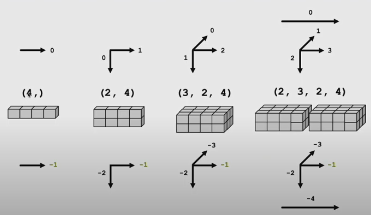

# creating arrays
    np.arange(20).reshape(4,5) #改變shape
    np.zeros((2,4))            #全是0
    np.ones((3,4))             #全是1
    np.full((2,2), 3)          #全是3(可自行指定)
    np.eye(3,3)                #單位矩陣
    np.linspace(0, 10, num=4)  # 0~10均等切4個數
    np.random.random((2,2))    # 0~1隨機
    np.nan                     #nan

# nparray加法
*shape不同不行運算 除非

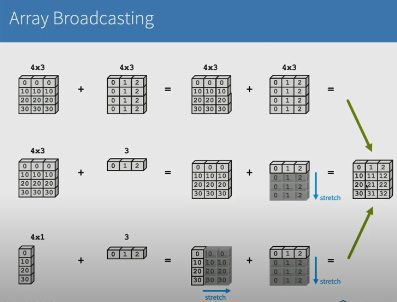

    [[ 0]
     [10]
     [20]    +  [0 1 2] 
     [30]]

In [70]:
a1 = np.arange(0,40,10).reshape(4,1) 
a2 = np.arange(3)
a3 = a1+a2
a3

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

# array calculation methods
.sum()

    [1,2,3]
    [4,5,6]

In [79]:
a = np.array([[1,2,3],
              [4,5,6]])
a.sum() #1+2+...+5+6

21

In [77]:
a.sum(axis = 0) #[1+4 , 2+5 , 3+6]

array([5, 7, 9])

In [78]:
a.sum(axis = -1) #[1+2+3 , 4+5+6]

array([ 6, 15])

.max/min() 

    [1,2,3]
    [4,5,6]

In [82]:
a = np.array([[1,2,3],[4,5,6]])
a.max()

6

In [83]:
a.max(axis = 0)

array([4, 5, 6])

In [86]:
np.min(a,axis = 1)

array([1, 4])

.argmin/max() #最小值最大值的索引位置
    
    [1,2,3]
    [4,5,6]

In [87]:
a.argmax()

5

In [88]:
a.argmin()

0

In [89]:
a.argmax(axis = 0)

array([1, 1, 1], dtype=int64)

    numpy.unravel_index(indices, shape)
    返回indices中的元素在维度为shape的数组中的索引值(座標)，
    默认按元组的形式返回
    
    [0,1,2]
    [3,4,5]

In [58]:
np.unravel_index(indices=[5], shape=(2,3))

(array([1], dtype=int64), array([2], dtype=int64))

    np.where(condition, x, y)
    
    满足条件(condition)，输出x，不满足输出y
    
    np.where(condition)
    輸出滿足條件的座標(索引值)
    
    [1,2,3]
    [4,5,6]

In [93]:
np.where(a>2,1,0)

array([[0, 0, 1],
       [1, 1, 1]])

In [94]:
np.where(a>2)  #[0,2][1,0][1,1][1,2]

(array([0, 1, 1, 1], dtype=int64), array([2, 0, 1, 2], dtype=int64))

# exercises

Wind Statistics
----------------
Topics: Using array methods over different axes, fancy indexing.
1. The data in 'wind.data' has the following format::
        61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71
   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.
   Use the 'loadtxt' function from numpy to read the data into
   an array.
2. Calculate the min, max and mean windspeeds and standard deviation of the
   windspeeds over all the locations and all the times (a single set of numbers
   for the entire dataset).
3. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)
4. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)
5. Find the location which has the greatest windspeed on each day (an integer
   column number for each day).
6. Find the year, month and day on which the greatest windspeed was recorded.
7. Find the average windspeed in January for each location.
You should be able to perform all of these operations without using a for
loop or other looping construct.
Bonus
~~~~~
1. Calculate the mean windspeed for each month in the dataset.  Treat
   January 1961 and January 1962 as *different* months. (hint: first find a
   way to create an identifier unique for each month. The second step might
   require a for loop.)

Bonus Bonus
~~~~~~~~~~~
Calculate the mean windspeed for each month without using a for loop.
(Hint: look at `searchsorted` and `add.reduceat`.)
Notes
~~~~~
These data were analyzed in detail in the following article:
   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.
See :ref:`wind-statistics-solution`.


第一題 : 將檔案讀入(前3行為年/月/日 後12列為12個不同地區當日平均風速)

In [7]:
from numpy import loadtxt
wind_data = loadtxt("wind.data") #將 data txt檔載入

In [35]:
wind_data

array([[61.  ,  1.  ,  1.  , ..., 12.58, 18.5 , 15.04],
       [61.  ,  1.  ,  2.  , ...,  9.67, 17.54, 13.83],
       [61.  ,  1.  ,  3.  , ...,  7.67, 12.75, 12.71],
       ...,
       [78.  , 12.  , 29.  , ..., 16.42, 18.88, 29.58],
       [78.  , 12.  , 30.  , ..., 12.12, 14.67, 28.79],
       [78.  , 12.  , 31.  , ..., 11.38, 12.08, 22.08]])

第二題 : 計算全部資料的最小值最大值平均標準差

In [19]:
data = wind_data[:, 3:]

print('2. Statistics over all values')
print('  min:', data.min())
print('  max:', data.max())
print('  mean:', data.mean())
print('  standard deviation:', data.std())
print()

2. Statistics over all values
  min: 0.0
  max: 42.54
  mean: 10.22837377040868
  standard deviation: 5.603840181095793



第三題 : 分別計算12個地區資料的最小值最大值平均標準差

In [22]:
print('3. each location over all the days')
print('  min:', data.min(axis = 0))
print('  max:', data.max(axis = 0))
print('  mean:', data.mean(axis = 0))
print('  standard deviation:', data.std(axis = 0))
print()

3. each location over all the days
  min: [0.67 0.21 1.5  0.   0.13 0.   0.   0.   0.   0.04 0.13 0.67]
  max: [35.8  33.37 33.84 28.46 37.54 26.16 30.37 31.08 25.88 28.21 42.38 42.54]
  mean: [12.36371463 10.64644813 11.66010344  6.30627472 10.45688013  7.09225434
  9.7968345   8.49442044  8.49581838  8.70726803 13.121007   15.59946152]
  standard deviation: [5.61918301 5.26820081 5.00738377 3.60513309 4.93536333 3.96838126
 4.97689374 4.49865783 4.16746101 4.50327222 5.83459319 6.69734719]



第四題 : 分別計算每天資料的最小值最大值平均標準差

In [23]:
print('4. each day over all locations ')
print('  min:', data.min(axis = 1))
print('  max:', data.max(axis = 1))
print('  mean:', data.mean(axis = 1))
print('  standard deviation:', data.std(axis = 1))
print()

4. each day over all locations 
  min: [9.29 6.5  6.17 ... 8.71 9.13 9.59]
  max: [18.5  17.54 18.5  ... 29.58 28.79 27.29]
  mean: [13.09666667 11.79833333 11.34166667 ... 14.89       15.3675
 15.4025    ]
  standard deviation: [2.5773188  3.28972854 3.50543348 ... 5.51175108 5.30456427 5.45971172]



第五題 : 找出每天風速最大的地區(用第N行表示該地區)

In [36]:
print('5. Location of daily maximum')
#np.set_printoptions(threshold=np.inf) #顯示全部資料
print('  daily max location:\n', data.argmax(axis=1))
print()

5. Location of daily maximum
  daily max location:
 [10 10  0 ... 11 11  2]



第六題 : 找出最大風速是幾年/月/日

In [39]:
daily_max = data.max(axis=1)
daily_max                       #每天的最大風速

array([18.5 , 17.54, 18.5 , ..., 29.58, 28.79, 27.29])

In [69]:
max_row = daily_max.argmax()
max_row                        #每天最大風速裡面最大值是第2161個

2161

In [68]:
max_row, max_col = np.unravel_index(data.argmax(), data.shape)
print(max_row)
print(max_col)                #全部資料裡面最大值的索引

2161
11


In [71]:
max_row, max_col = np.where(data == data.max())
print(max_row)
print(max_col)               #全部資料裡面最大值的索引

[2161]
[11]


In [74]:
wind_data[max_row,:3]  #66年12月2日

array([[66., 12.,  2.]])

第七題 : 找出每個地區1月的平均風速

In [75]:
january_indices = wind_data[:, 1] == 1
january_indices

array([ True,  True,  True, ..., False, False, False])

In [76]:
january_data = data[january_indices]
january_data

array([[15.04, 14.96, 13.17, ..., 12.58, 18.5 , 15.04],
       [14.71, 16.88, 10.83, ...,  9.67, 17.54, 13.83],
       [18.5 , 16.88, 12.33, ...,  7.67, 12.75, 12.71],
       ...,
       [29.38, 18.54, 28.08, ..., 20.5 , 19.12, 38.2 ],
       [ 9.62,  8.71,  9.59, ...,  4.46, 10.41, 12.83],
       [10.5 ,  8.79,  9.54, ...,  6.38,  6.54, 17.37]])

In [77]:
print('7. Statistics for January')
print('  mean:', january_data.mean(axis=0))
print()

7. Statistics for January
  mean: [14.86955197 12.92166667 13.29962366  7.19949821 11.67571685  8.05483871
 11.81935484  9.5094086   9.54320789 10.05356631 14.55051971 18.02876344]



bonus : 計算每個月豐素的平均值

In [85]:
months = (wind_data[:, 0] - 61) * 12 + wind_data[:, 1] - 1
months  #總共216個月

array([  0.,   0.,   0., ..., 215., 215., 215.])

In [87]:
months = months.astype(int) 
months     #等下要用來當索引值所以要轉成 int

array([  0,   0,   0, ..., 215, 215, 215])

In [100]:
month_values = set(months)
month_values # get set of unique months

In [90]:
monthly_means = np.zeros(len(month_values)) #初始化

In [92]:
for month in month_values:
    # find the rows that correspond to the current month
    day_indices = (months == month)

    # extract the data for the current month using fancy indexing
    month_data = data[day_indices]

    # find the mean
    monthly_means[month] = month_data.mean()

    # Note: experts might do this all-in one
    # monthly_means[month] = data[months==month].mean()

# In fact the whole for loop could reduce to the following one-liner
# monthly_means = array([data[months==month].mean() for month in month_values])

In [94]:
print("Bonus ")
print("  mean:", monthly_means)
print()

Bonus 
  mean: [11.38064516 13.49235119 11.07236559 ...  9.23389785 12.72102778
 12.70357527]



bonus bonus

In [99]:
# compute the month number for each day in the dataset
months = (wind_data[:, 0] - 61) * 12 + wind_data[:, 1] - 1

# find the indices for the start of each month
# this is a useful trick - we use range from 0 to the
# number of months + 1 and searchsorted to find the insertion
# points for each.
month_indices = np.searchsorted(months, np.arange(months[-1] + 2))

# now use add.reduceat to get the sum at each location
monthly_loc_totals = np.add.reduceat(data, month_indices[:-1])

# now use add to find the sum across all locations for each month
monthly_totals = monthly_loc_totals.sum(axis=1)

# now find total number of measurements for each month
month_days = month_indices[1:] - month_indices[:-1]
measurement_count = month_days * 12

# compute the mean
monthly_means = monthly_totals / measurement_count

print("Bonus Bonus")
print("  mean:", monthly_means)

# Notes: this method relies on the fact that the months are contiguous in the
# data set - the method used in the bonus section works for non-contiguous
# days.

Bonus Bonus
  mean: [11.38064516 13.49235119 11.07236559 ...  9.23389785 12.72102778
 12.70357527]


# 多維變一維的函式
    np.flatten()
    np.ravel()  #會改變原本多維的值

In [78]:
a2D = np.array([[0,1],[2,3]])
a1D = a2D.flatten()
a1D

array([0, 1, 2, 3])

In [79]:
a1D[0] = 10
a1D

array([10,  1,  2,  3])

In [80]:
a2D

array([[0, 1],
       [2, 3]])

In [81]:
b2D = np.array([[0,1],[2,3]])
b1D = b2D.ravel()
b1D

array([0, 1, 2, 3])

In [82]:
b1D[0] = 10
b1D

array([10,  1,  2,  3])

In [83]:
b2D

array([[10,  1],
       [ 2,  3]])

# 轉置
    .T

In [84]:
array_a = np.array([[1,2],
                    [3,4],
                    [5,6]])
aT = array_a.T
aT

array([[1, 3, 5],
       [2, 4, 6]])